# Import

In [1]:
from scipy import stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

# Utils

In [2]:
def draw_from_beta(clicks, misses):
  """Draw random number from Beta."""
  clicks, misses = (clicks, misses) if min(clicks, misses) > 0 else (clicks+1, misses+1)
  return np.random.beta(a=clicks, b=misses)

def beta_mean(clicks, misses):
  """Expected value of Beta."""
  clicks, misses = (clicks, misses) if min(clicks, misses) > 0 else (clicks+1, misses+1)
  return stats.beta(a=clicks, b=misses).mean() #, stats.beta(a=clicks, b=misses).var()

def beta_std(clicks, misses):
  """Standard deviation of Beta."""
  clicks, misses = (clicks, misses) if min(clicks, misses) > 0 else (clicks+1, misses+1)
  return stats.beta(a=clicks, b=misses).std()

# Examples

,users,clicks,click rate
red page,10,1,.10
blue page,10,2,.20


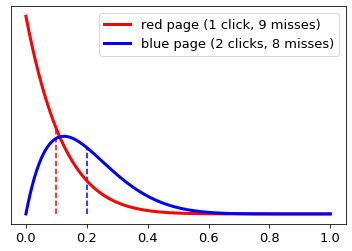

In [3]:
counts_after_20 = pd.DataFrame([[10, 1, ".10"], [10, 2, ".20"]], index=["red page", "blue page"], columns=["users", "clicks", "click rate"])

display(counts_after_20)

x = np.linspace(0,1,1000)

fig, ax = plt.subplots()

for variant in counts_after_20.index:
    clicks, misses = counts_after_20.loc[variant, "clicks"], counts_after_20.loc[variant, "users"] - counts_after_20.loc[variant, "clicks"]
    n = clicks + misses
    pdf = stats.beta(a=clicks, b=misses).pdf(x=x)
    mean = stats.beta(a=clicks, b=misses).mean()
    color = variant.split(" ")[0]
    ax.plot(x, pdf, lw=3, label=f"{variant} ({clicks} click{'s' if clicks > 1 else ''}, {misses} misses)", color=color)
    ax.vlines(x=mean, ymin=0, ymax=stats.beta(a=clicks, b=misses).pdf(mean), ls="--", color=color)
    ax.set_yticks([])

ax.tick_params(axis='both', which='major', labelsize=13)
ax.legend(fontsize=13)

fig.savefig("red_vs_blue_20_users.png", bbox_inches="tight", dpi=200)

In [4]:
print("how often a number drawn from a is > than a number drawn from b?")
print((np.random.beta(a=1, b=9, size=100_000) - (np.random.beta(a=2, b=8, size=100_000)) > 0).mean())

how often a number drawn from a is > than a number drawn from b?
0.236


,users,clicks,click rate
red page,5000,550,0.11
blue page,5000,900,0.18


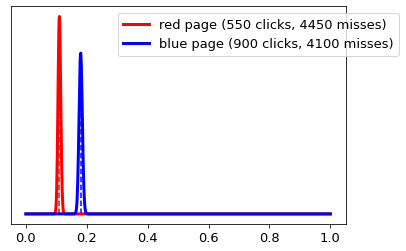

In [5]:
counts_after_1000 = pd.DataFrame([[5_000, int(5_000 * .11), .11], [5_000, int(5_000 * .18), .18]], index=["red page", "blue page"], columns=["users", "clicks", "click rate"])

display(counts_after_1000)

x = np.linspace(0,1,1000)

fig, ax = plt.subplots()

for variant in counts_after_1000.index:
    clicks, misses = counts_after_1000.loc[variant, "clicks"], counts_after_1000.loc[variant, "users"] - counts_after_1000.loc[variant, "clicks"]
    n = clicks + misses
    pdf = stats.beta(a=clicks, b=misses).pdf(x=x)
    mean = stats.beta(a=clicks, b=misses).mean()
    color = variant.split(" ")[0]
    ax.plot(x, pdf, lw=3, label=f"{variant} ({clicks} click{'s' if clicks > 1 else ''}, {misses} misses)", color=color)
    ax.vlines(x=mean, ymin=0, ymax=stats.beta(a=clicks, b=misses).pdf(mean), ls="--", color=color)
    ax.set_yticks([])

ax.tick_params(axis='both', which='major', labelsize=13)
ax.legend(bbox_to_anchor=(.3, 1), fontsize=13)

fig.savefig("red_vs_blue_10000_users.png", bbox_inches="tight", dpi=200)

In [6]:
print("how often a number drawn from a is > than a number drawn from b?")
print((np.random.beta(a=550, b=4450, size=100_000) - (np.random.beta(a=900, b=4100, size=100_000)) > 0).mean())

how often a number drawn from a is > than a number drawn from b?
0.0


# Beta distribution depending on the number of impressions

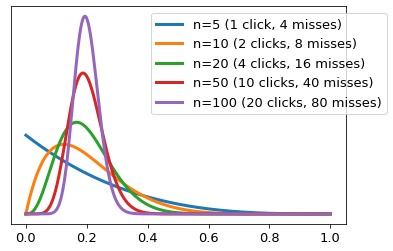

In [7]:
params = {
    0: [1, 4],
    1: [2, 8],
    2: [4, 16],
    3: [10, 40],
    4: [20, 80]
}

x = np.linspace(0,1,1000)

fig, ax = plt.subplots()

for i in sorted(params.keys()):
    clicks, misses = params[i]
    n = clicks + misses
    pdf = stats.beta(a=clicks, b=misses).pdf(x=x)
    ax.plot(x, pdf, lw=3, label=f"n={n} ({clicks} click{'s' if clicks > 1 else ''}, {misses} misses)")
    ax.set_yticks([])

ax.tick_params(axis='both', which='major', labelsize=13)
ax.legend(bbox_to_anchor=(.4, 1), fontsize=13)

fig.savefig("beta_by_n.png", bbox_inches="tight", dpi=200)

# Beta vs Normal

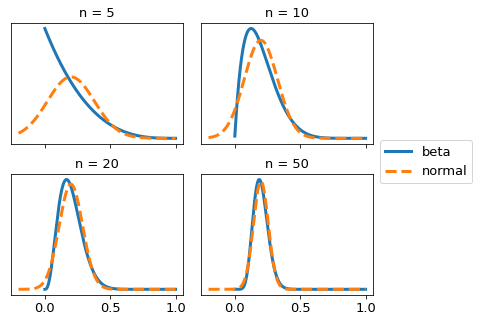

In [8]:
params = {
    0: [1, 4],
    1: [2, 8],
    2: [4, 16],
    3: [10, 40]
}

x_norm = np.linspace(-.2,1,1000)
x_beta = x[x > 0]

fig, ax = plt.subplots(2, 2, figsize=(6.5,5), sharex=True)
plt.subplots_adjust(hspace=.25, wspace=.1)

for i in sorted(params.keys()):
    clicks, misses = params[i]
    
    n = clicks + misses
    click_rate = clicks / n

    pdf_beta = stats.beta(a=clicks, b=misses).pdf(x=x_beta)
    pdf_norm = stats.norm(loc=click_rate, scale=np.sqrt(click_rate*(1-click_rate)/n)).pdf(x=x_norm)

    ax[divmod(i, 2)].set_title(f"n = {n}", fontsize=13)
    ax[divmod(i, 2)].plot(x_beta, pdf_beta, lw=3, label="beta")
    ax[divmod(i, 2)].plot(x_norm, pdf_norm, lw=3, ls="--", label="normal")
    ax[divmod(i, 2)].set_yticks([])
    ax[divmod(i, 2)].tick_params(axis='both', which='major', labelsize=13)
    
ax[1,1].legend(loc="center left", bbox_to_anchor=(1, 1.1), fontsize=13)

fig.savefig("beta_vs_normal.png", bbox_inches="tight", dpi=200)

# Experiment

In [9]:
ground_truth = pd.Series({
  "grey": .09, 
  "red": .11, 
  "green": .16, 
  "blue": .18})

n_sample = 1_000

In [10]:
%%time

variants = [items[0] for items in sorted(ground_truth.items(), key=lambda item: item[1])]
counts = pd.DataFrame(data=0, index=ground_truth.index, columns=["clicks", "misses"])
counts_hist = []
random_numbers_hist = []
selected_hist = []
outcome_hist = []

for i in tqdm(range(n_sample)):
  
  random_numbers = counts.apply(lambda row: 
    draw_from_beta(
      clicks=row["clicks"], 
      misses=row["misses"]), axis=1)
  
  selected = random_numbers.idxmax()
  
  outcome = np.random.choice(
    a=["clicks", "misses"], 
    p=[ground_truth[selected], 1-ground_truth[selected]])
  
  counts_hist.append(counts.copy())
  random_numbers_hist.append(random_numbers)
  selected_hist.append(selected)
  outcome_hist.append(outcome)

  counts.loc[selected, outcome] += 1

100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1240.61it/s]

Wall time: 815 ms


,clicks,misses
grey,0,0
red,0,0
green,0,0
blue,0,0


,draw
grey,0.043875
red,0.618462
green,0.688098
blue,0.750732


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


,clicks,misses
grey,0,0
red,0,0
green,0,0
blue,0,1


,draw
grey,0.787249
red,0.139425
green,0.407114
blue,0.186959


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


,clicks,misses
grey,0,1
red,0,0
green,0,0
blue,0,1


,draw
grey,0.572221
red,0.800611
green,0.305996
blue,0.365673


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


,clicks,misses
grey,0,2
red,1,3
green,0,2
blue,0,2


,draw
grey,0.231553
red,0.260922
green,0.158978
blue,0.359500


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


,clicks,misses
grey,0,16
red,1,17
green,14,36
blue,1,15


,draw
grey,0.053615
red,0.084655
green,0.241520
blue,0.040748


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


,clicks,misses
grey,0,26
red,16,125
green,95,483
blue,42,212


,draw
grey,0.038470
red,0.117135
green,0.165618
blue,0.152715


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


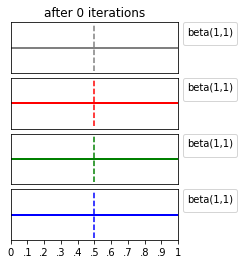

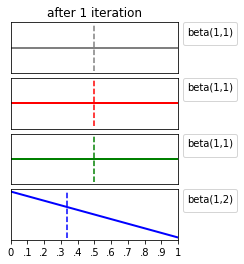

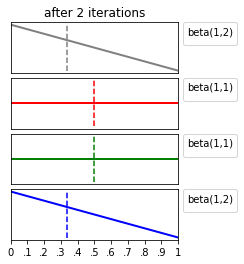

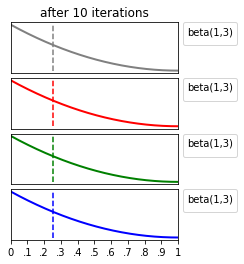

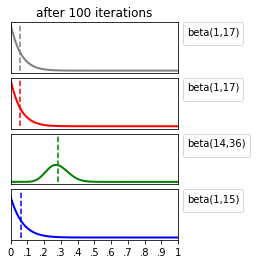

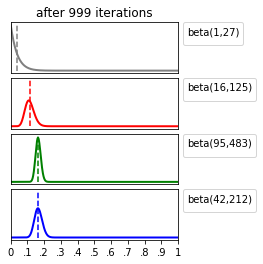

In [11]:
x = np.linspace(0,1,1000)

for k in [0, 1, 2, 10, 100, 999]:
    
  display(counts_hist[k])
  display(random_numbers_hist[k].to_frame(name="draw"))

  fig, ax = plt.subplots(4, 1, figsize=(3,4), sharey=True)
  plt.subplots_adjust(hspace=.1)
  
  pdf_max = 2
    
  ax[0].set_title(f"after {k} iteration{'' if k == 1 else 's'}")
  
  for i, variant in enumerate(variants):
    clicks, misses = counts_hist[k].loc[variant, :]
    clicks, misses = (clicks, misses) if min(clicks, misses) > 0 else (clicks+1, misses+1)
    pdf = stats.beta.pdf(x=x, a=clicks, b=misses)
    pdf_max = max(pdf_max, np.max(pdf))
    ax[i].plot(x, pdf, lw=2, color=variant)
    ax[i].set_yticks([])
    ax[i].set_xticks([])
    ax[i].set_xlim(0, 1)
    ax[i].legend(title=f"beta({clicks},{misses})", loc="upper left", bbox_to_anchor=(1, 1.1))
      
  for i, variant in enumerate(variants):
    clicks, misses = counts_hist[k].loc[variant, :]
    clicks, misses = (clicks, misses) if min(clicks, misses) > 0 else (clicks+1, misses+1)
    ax[i].vlines(x=clicks/(clicks+misses), ymin=0, ymax=pdf_max, ls="--", color=variant)
      
  ax[i].set_xticks(np.linspace(0,1,11))
  ax[i].set_xticklabels(["0"]+[str(x).lstrip("0") for x in np.round(np.linspace(.1,.9,9),2)]+["1"])
  fig.savefig(fname=f"after_{k}_iter.png", bbox_inches="tight", dpi=200)

In [12]:
mean_hist = pd.DataFrame(
  [counts.apply(lambda row: beta_mean(clicks=row["clicks"], misses=row["misses"]), axis=1) for counts in counts_hist])
std_hist = pd.DataFrame(
  [counts.apply(lambda row: beta_std(clicks=row["clicks"], misses=row["misses"]), axis=1) for counts in counts_hist])

In [13]:
n_iter = 400

xlim = (-.025, .525)
ylim = (-.015, .315)

for i in range(n_iter):
  i_str = str(i).zfill(3)
  fig, ax = plt.subplots()
  ax.set_axisbelow(True)
  ax.set_title(f"iteration {i_str}")
  ax.scatter(mean_hist.loc[i, "grey"], std_hist.loc[i, "grey"], color="grey", marker=4, s=50)
  ax.scatter(mean_hist.loc[i, "red"], std_hist.loc[i, "red"], color="red", marker=5, s=50)
  ax.scatter(mean_hist.loc[i, "green"], std_hist.loc[i, "green"], color="lime", marker=6, s=50)
  ax.scatter(mean_hist.loc[i, "blue"], std_hist.loc[i, "blue"], color="blue", marker=7, s=50)
  ax.set_xticks(np.round(np.linspace(0, .5, 11),2))
  ax.set_xlim(xlim)
  ax.set_ylim(ylim)
  ax.set_xlabel("mean")
  ax.set_ylabel("std")
  ax.grid()
  fig.savefig(fname=f"img/img_{i_str}.png", bbox_inches="tight", dpi=200)
  plt.close()

In [14]:
counts

,clicks,misses
grey,0,26
red,16,125
green,95,484
blue,42,212


In [15]:
counts_equal = pd.DataFrame({variant: {
  "clicks": n_sample / len(variants) * ground_truth[variant], 
  "misses": n_sample / len(variants) * (1 - ground_truth[variant])} 
  for variant in variants}).T

In [16]:
counts_equal

,clicks,misses
grey,22.5,227.5
red,27.5,222.5
green,40.0,210.0
blue,45.0,205.0


In [17]:
counts["clicks"].sum() / counts_equal["clicks"].sum() - 1

0.1333333333333333